_Machine Learning Dr.Aliyari_


**Masih Mokhtari**

**40211454**
****
_mini project $2$_

$Q1$

At first we disable warnings.

In [2]:
import warnings
warnings.filterwarnings("ignore") # Disable all warnings

Before we start, we have to import libraries we need.

In [3]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import itertools

from sklearn.metrics import classification_report

import tensorflow as tf

I want to create 2000 points for generating data we want to use it for classification only one time.

In [3]:
num_point = 2000
x_val = np.random.uniform( 0 , 4 , num_point )
#y_val = np.random.uniform( -1 , 3 , num_point ) +   np.random.normal(0,0.01,2000)
y_val = np.random.uniform( -1 , 3 , num_point )

In [14]:
tol = 1e-1

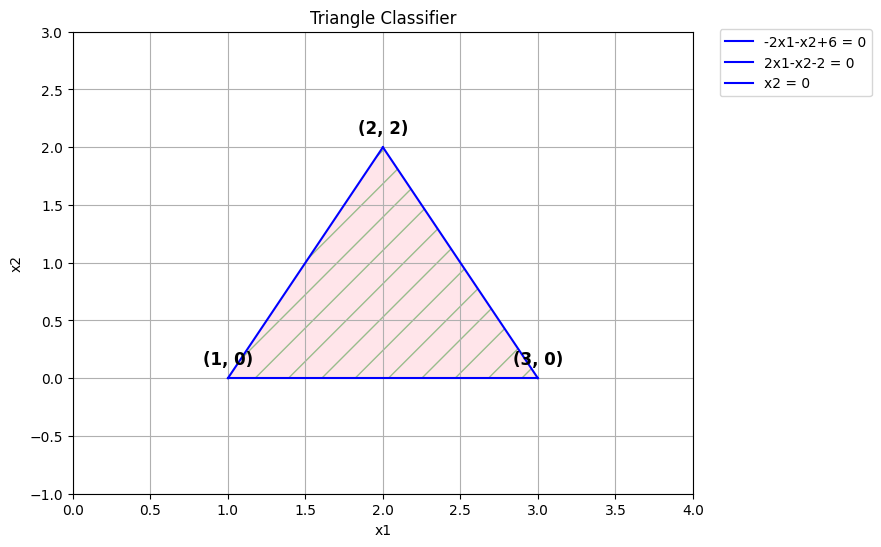

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Triangle Classifier')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('without_activation_fcn.png', bbox_inches='tight')

plt.show()

In [ ]:
x_val
rlx = relu(x_val)
sigx = sigmoid(x_val)
tghx = tgh(x_val)
print(rlx)
print(sigx)
print(tghx)
min(tghx)
flag = []
for i in range(num_point):
  flag.append(Triangle(x_val[i] , y_val[i]))

#flag


[3.71117917 2.94783812 2.54018792 ... 3.81500934 1.78561555 3.29383713]
[0.9761348  0.95016121 0.92691156 ... 0.97843767 0.85638889 0.96421678]
[0.99880524 0.99451247 0.9876417  ... 0.99902917 0.94529592 0.99724931]


## Part1

In this part we are doing classification without activation function.

In [ ]:
#define muculloch pitts
class McCulloch_Pitts_neuron():
  def __init__(self, weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, X ):
    if ((self.weights @ X)  + self.threshold) >= 0 :
      return 1
    else :
      return 0

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6 )
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2 )
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0 )
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3 )

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))


  return list([zone4])

In [ ]:
my_points = [(3,1),(2,1)]
result = []
x,y=my_points[0]
for iter in range(len(my_points)):
  x,y=my_points[iter]
  result.append(Triangle(x,y))
#print(result)
#type(result)
print("Result for point", my_points[0],",is",result[0][0],"that means the point_1 is out of the Triangle.")
print("Result for point", my_points[1],",is",result[1][0],"that means the point_2 is in the Triangle.")

Result for point (3, 1) ,is 0 that means the point_1 is out of the Triangle.
Result for point (2, 1) ,is 1 that means the point_2 is in the Triangle.


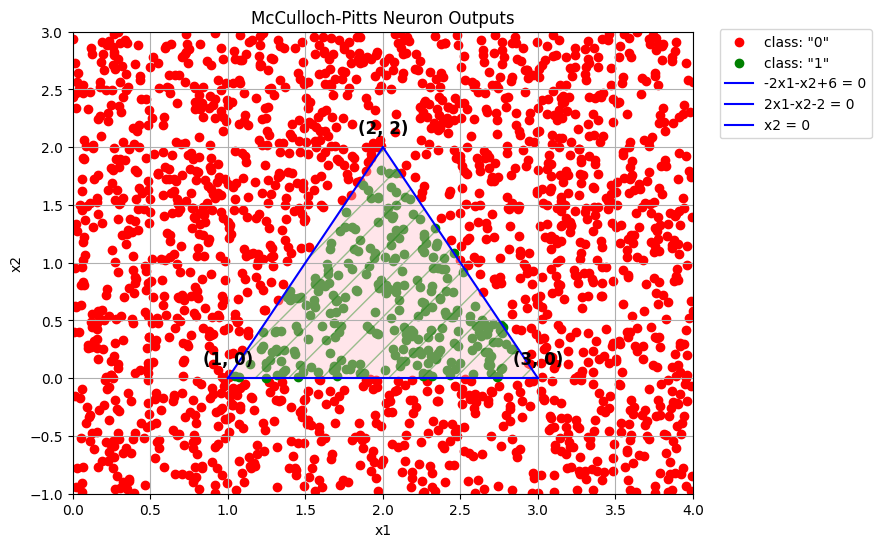

In [ ]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('without_activation_fcn.png', bbox_inches='tight')

plt.show()

## Part2

In this part we are doing classification with sigmoid as activation function.

In [ ]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tgh(x):
    return np.tanh(x)

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  #neur1.set_activation_function(sigmoid)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  #neur2.set_activation_function(sigmoid)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  #neur3.set_activation_function(sigmoid)
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(sigmoid)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))


  return list([zone4])

In [ ]:
Triangle(2.5,.1)

[0.52497918747894]

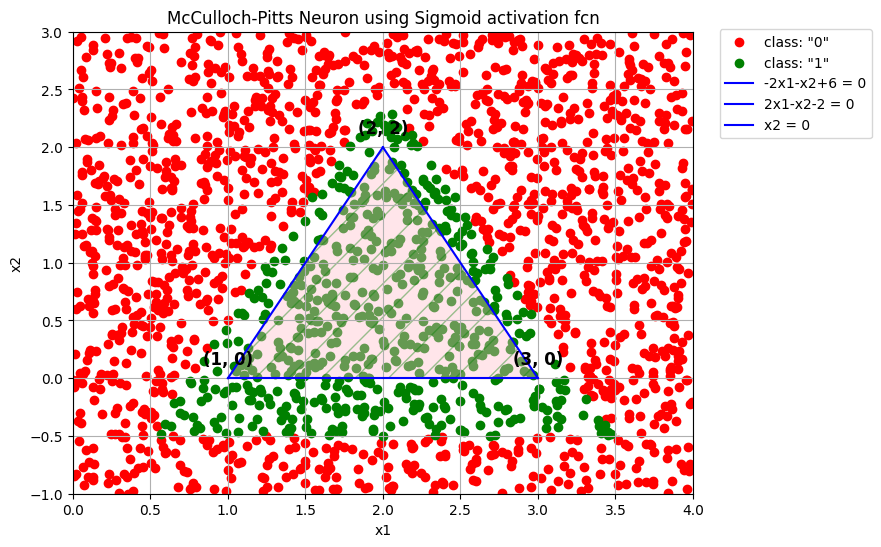

In [ ]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag[0] < 0.5 :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron using Sigmoid activation fcn')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('with_sigmoid_activation_fcn.png', bbox_inches='tight')

plt.show()

## Part3

In this part we are doing classification with RELU as activation function. We know this activation function is mapping values lower than zero into Zero and upper than zero into its values. We have to define a tolerance that can help us classify points correctly.

In [ ]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tgh(x):
    return np.tanh(x)

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(relu)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(relu)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  # neur3.set_activation_function(relu)

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(relu)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))


  return list([zone4])

In [ ]:
Triangle(2,0.1)

[0.10000000000000009]

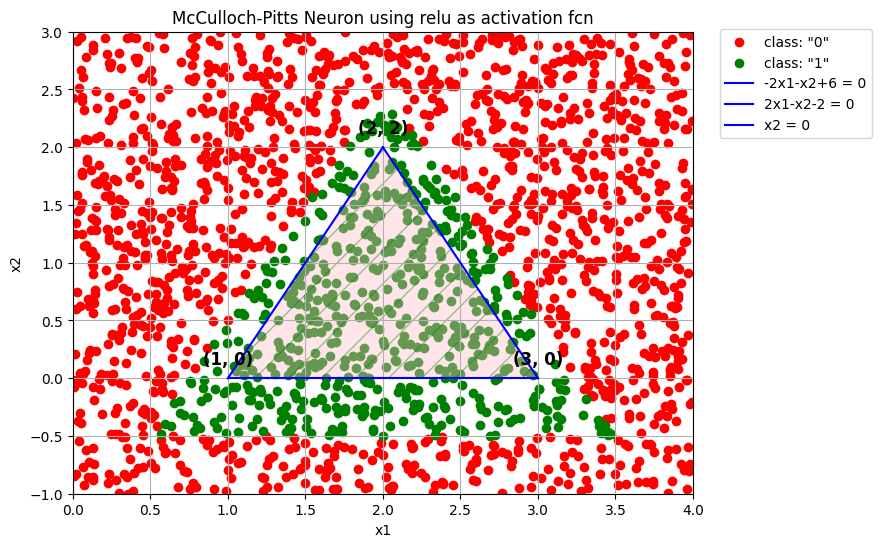

In [ ]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  #if flag == [0] :
  if flag[0] == 0 :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron using relu as activation fcn')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('with_RELU_activation_fcn.png', bbox_inches='tight')

plt.show()

## Part4

In this part we are doing classification with tgh as activation function.

In [ ]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tgh(x):
    return np.tanh(x)

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(relu)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(relu)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  # neur3.set_activation_function(relu)

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(tgh)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))


  return list([zone4])



In [ ]:
Triangle(1,1)

[-0.7162978701990244]

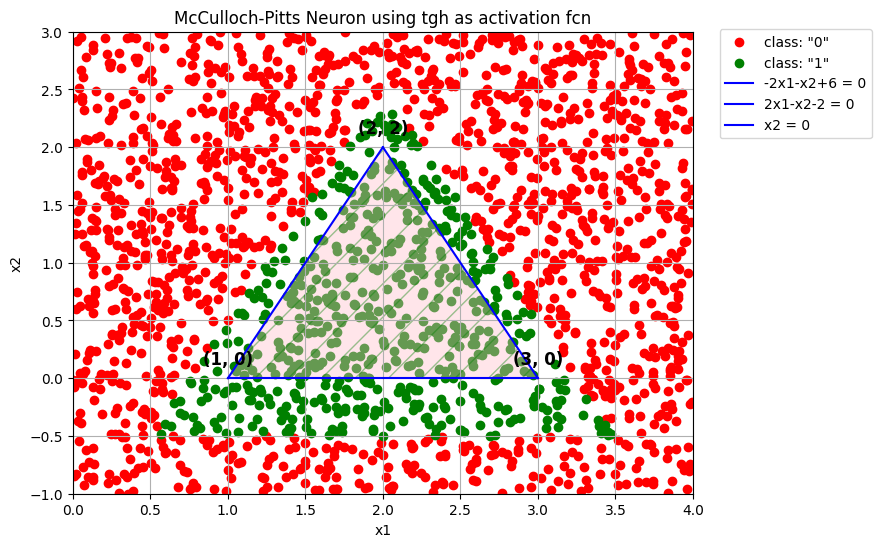

In [ ]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  #if flag == [0] :
  if flag[0] < 0 :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron using tgh as activation fcn')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('with_tgh_activation_fcn.png', bbox_inches='tight')

plt.show()

## part5

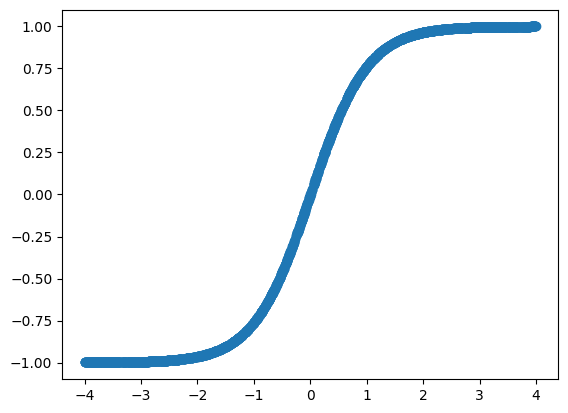

In [ ]:
plt.scatter(x_val,tgh(x_val))

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  2+tol )
  # Set activation functions
  #neur1.set_activation_function(sigmoid)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , 2+tol )
  #neur2.set_activation_function(sigmoid)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  #neur3.set_activation_function(sigmoid)
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(sigmoid)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))


  return list([zone4])

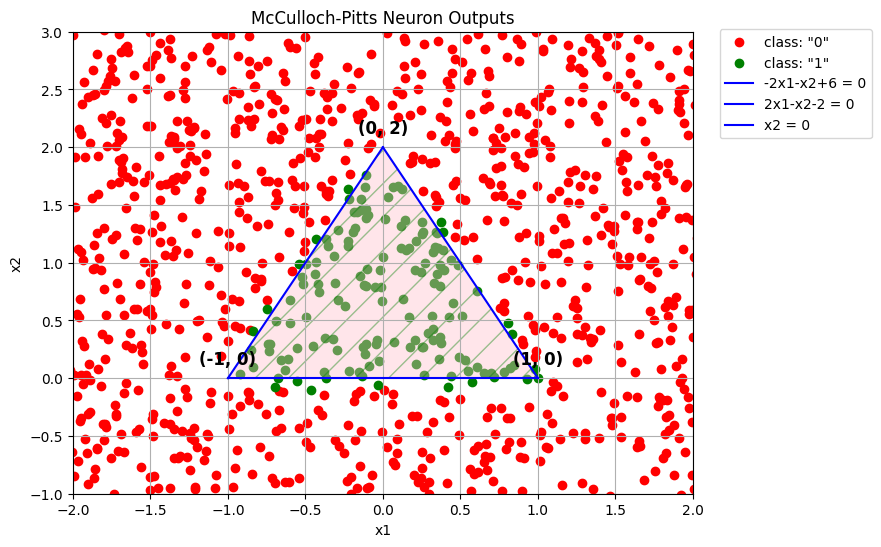

In [ ]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag[0] < 0.5 :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(0, 2), (1, 0), (-1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [0,1]
y_l1 = [2,0]
x_l2 = [-1,0]
y_l2 = [0,2]
x_l3 = [-1,1]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('with_sigmoid_activation_fcn.png', bbox_inches='tight')

plt.show()

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  2+tol )
  # Set activation functions
  #neur1.set_activation_function(sigmoid)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , 2+tol )
  #neur2.set_activation_function(sigmoid)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  #neur3.set_activation_function(sigmoid)
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(relu)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))


  return list([zone4])

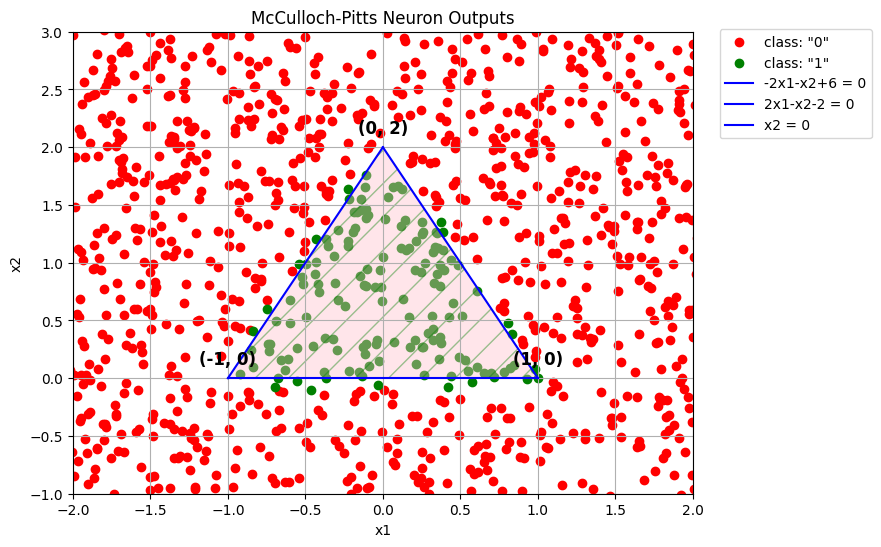

In [ ]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag[0] == 0 :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(0, 2), (1, 0), (-1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [0,1]
y_l1 = [2,0]
x_l2 = [-1,0]
y_l2 = [0,2]
x_l3 = [-1,1]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('with_sigmoid_activation_fcn.png', bbox_inches='tight')

plt.show()

## Part6

In [5]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tgh(x):
    return np.tanh(x)

In [16]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6-tol )
  # Set activation functions
  neur1.set_activation_function(tgh)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2-tol )
  neur2.set_activation_function(tgh)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  -4*tol )
  neur3.set_activation_function(tgh)

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -1.5+tol )
  neur4.set_activation_function(tgh)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])


In [ ]:
Triangle(2.5,0.6)

[0.6008615145978254]

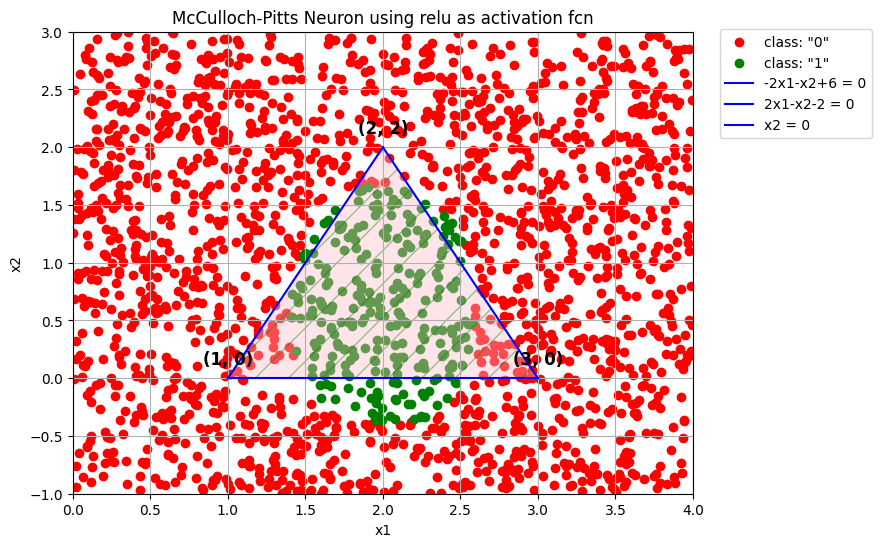

In [17]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  #if flag == [0] :
  if flag[0] < -tol :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron using relu as activation fcn')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('with_RELU_activation_fcn.png', bbox_inches='tight')

plt.show()

## Part7

In [18]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6-tol )
  # Set activation functions
  neur1.set_activation_function(sigmoid)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2-tol )
  neur2.set_activation_function(sigmoid)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  -4*tol )
  neur3.set_activation_function(sigmoid)

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -1.5+tol )
  neur4.set_activation_function(sigmoid)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])

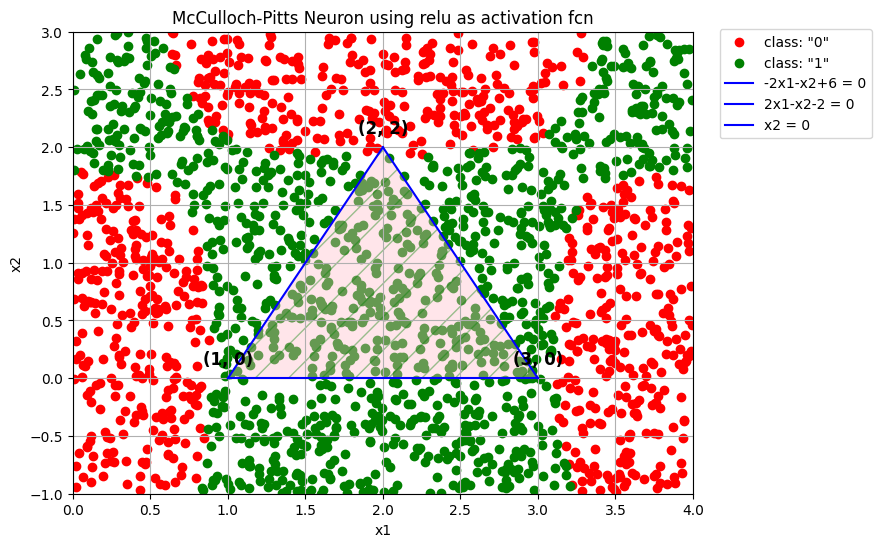

In [21]:
red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  #if flag == [0] :
  if flag[0] < 0.5+tol :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron using relu as activation fcn')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='solid', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='solid', label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle='solid', label='x2 = 0')
# ValueError: '_' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))

# Save plot as PDF
plt.savefig('with_RELU_activation_fcn.png', bbox_inches='tight')

plt.show()

## Part8

(-0.2, 1.2)

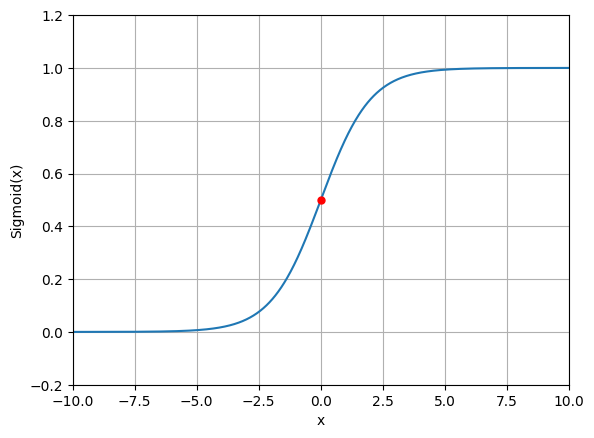

In [66]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, sigmoid(x), markeredgecolor="blue", markerfacecolor="blue")
plt.plot(0, 0.5, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-0.2, 1.2)

(-0.05, 1.0)

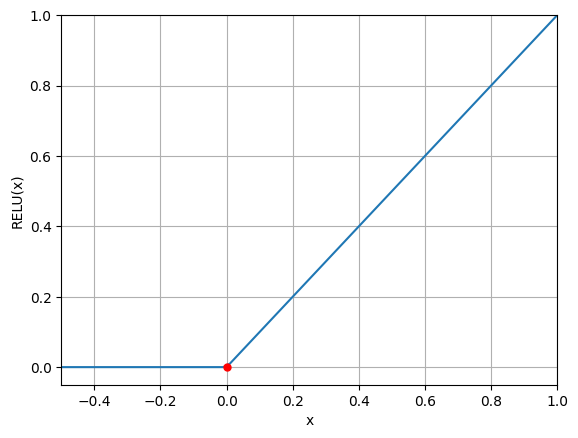

In [73]:
x_2 = np.linspace(-10, 10, 1000)
plt.plot(x, relu(x_2), markeredgecolor="blue", markerfacecolor="blue")
plt.plot(0, 0, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.xlabel("x")
plt.ylabel("RELU(x)")
plt.grid()
plt.xlim(-0.5, 1)
plt.ylim(-0.05, 1)

(-1.1, 1.1)

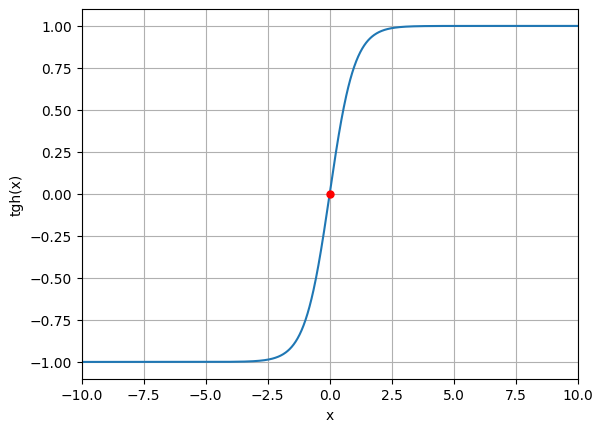

In [65]:
x_3 = np.linspace(-10, 10, 1000)
plt.plot(x, tgh(x_3), markeredgecolor="blue", markerfacecolor="blue")
plt.plot(0, 0, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.xlabel("x")
plt.ylabel("tgh(x)")
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-1.1, 1.1)

(-0.1, 1.1)

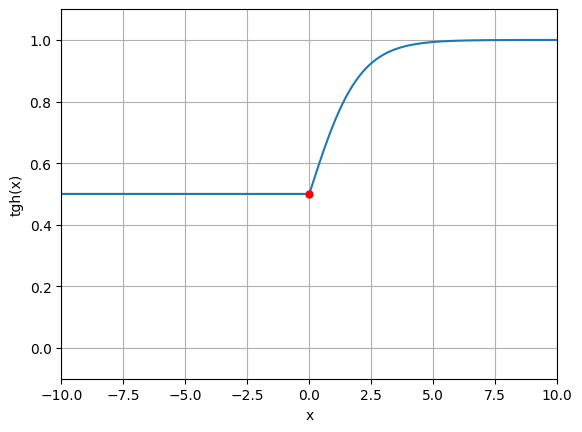

In [77]:
x_4 = np.linspace(-10, 10, 1000)
plt.plot(x, sigmoid(relu(x_4)), markeredgecolor="blue", markerfacecolor="blue")
plt.plot(0, 0.5, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.xlabel("x")
plt.ylabel("tgh(x)")
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

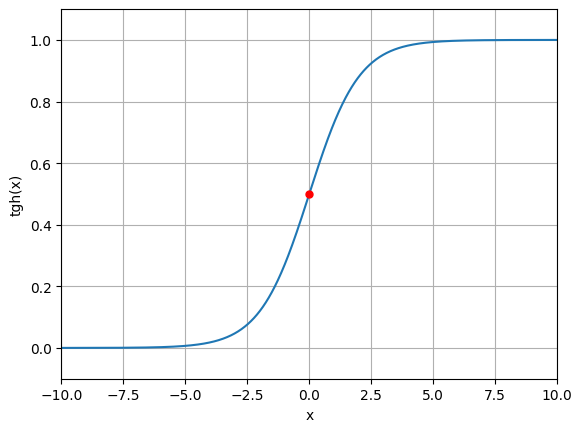

In [79]:
x_4 = np.linspace(-10, 10, 1000)
plt.plot(x, relu(sigmoid(x_4)), markeredgecolor="blue", markerfacecolor="blue")
plt.plot(0, 0.5, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.xlabel("x")
plt.ylabel("tgh(x)")
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-.1, 1.1)

(-10.0, 10.0)

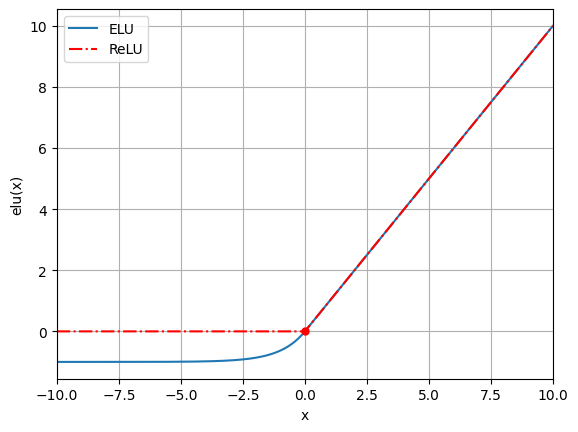

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def elu(x, alpha=1):
    return tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

def get_custom_elu(alpha=1.0):
    def elu(x):
        return elu(x, alpha)
    return elu

'''def elu(x , alpha = 0.01):
  if x>= 0:
    return x
  else:
    alpha*(np.exp(x)-1)'''



x_5 = np.linspace(-10, 10, 1000)
plt.plot(x_5, elu(x_5 , 1), markeredgecolor="blue", markerfacecolor="blue", label='ELU')
plt.plot(x_5, relu(x_5), 'r-.', markersize=0.3 , label='ReLU')
plt.plot(0, 0, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.xlabel("x")
plt.ylabel("elu(x)")
plt.grid()
plt.legend()
plt.xlim(-10, 10)

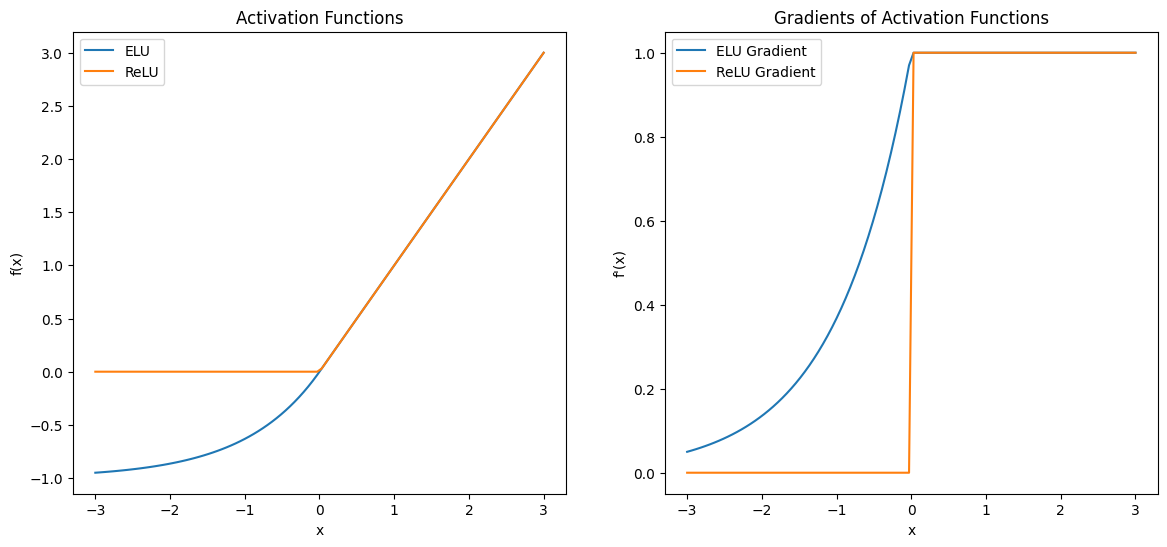

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define custom ELU activation
def custom_elu(x, alpha=1.0):
    return tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

# Define the gradient of ELU
@tf.function
def custom_elu_grad(x, alpha=1.0):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = custom_elu(x, alpha)
    return tape.gradient(y, x)

# Define the gradient of ReLU
@tf.function
def relu_grad(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = tf.nn.relu(x)
    return tape.gradient(y, x)

# Generate sample data
x_vals = np.linspace(-3, 3, 100)

# Calculate gradients
elu_grad_vals = custom_elu_grad(tf.constant(x_vals, dtype=tf.float32)).numpy()
relu_grad_vals = relu_grad(tf.constant(x_vals, dtype=tf.float32)).numpy()

# Plot the ELU and ReLU functions and their gradients
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_vals, custom_elu(tf.constant(x_vals)).numpy(), label='ELU')
plt.plot(x_vals, tf.nn.relu(tf.constant(x_vals)).numpy(), label='ReLU')
plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_vals, elu_grad_vals, label='ELU Gradient')
plt.plot(x_vals, relu_grad_vals, label='ReLU Gradient')
plt.title('Gradients of Activation Functions')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()

plt.show()
